# Data Science Final Exam

## Dear Students,<br><br>Welcome to your final exam in data science. Remember that the true essence of data science lies not only in obtaining results but in extracting meaningful insights.<br><br>In this examination we encourage you to focus not just on the output your code generates but on the story it tells. Sometimes, peculiar outcomes can act as beacons, signaling potential issues in your code or data. Rather than dismissing them, consider these anomalies as opportunities to refine your analysis and enhance your problem-solving skills.<br><br>As you progress through the tasks, think of your comments as a roadmap for others to follow your analytical journey. Clearly articulate your intentions before executing code, detail the steps you took, and, most importantly, provide a comprehensive interpretation of your results. A well-documented analysis not only showcases your technical proficiency but also your ability to think critically about the data at hand.<br><br>Remember, data science is not merely about crunching numbers; it's about crafting narratives that guide decision-making. Each line of code you write and every graph you create contributes to a broader story. Make sure your commentary reflects this understanding, and don't hesitate to acknowledge any challenges or uncertainties you encounter along the way.<br><br>Best of luck!

## Task 1. Hypothesis Testing (2 points)


**The data for this task is in `task_1.csv`**

#### Data task_1.csv:
* index - enumeration
* women_1 - weights of women observed (1st group)
* women_2 - weights of women observed (2nd group)
* men - weights of men observed

### 1.1 Check normality assumption for women_1 and women_2. 

In [78]:
# imports
#all the necessary library has been imported 
%matplotlib inline
import pandas as pd
#stats module has ttest 
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [79]:
df=pd.read_csv("task_1.csv")

In [80]:
df.shape

(1000, 4)

In [81]:
df.head()

,index,women_1,women_2,men
0,0,73.098928,78.0,88.274204
1,1,73.613758,65.0,85.956865
2,2,56.480751,65.0,66.678725
3,3,81.904591,91.0,69.819411
4,4,67.361169,104.0,75.928297


C:\Users\USER\AppData\Local\Temp\ipykernel_14844\4016389302.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weight)


<Axes: title={'center': 'Histogram with weight'}, xlabel='women_1', ylabel='Density'>

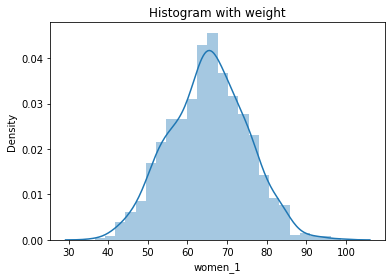

In [82]:
weight=df['women_1']
plt.xlabel("weights for women_1")
plt.title("Histogram with weight")
sns.distplot(weight)

C:\Users\USER\AppData\Local\Temp\ipykernel_14844\1832421605.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weight)


<Axes: title={'center': 'Histogram with weight'}, xlabel='women_2', ylabel='Density'>

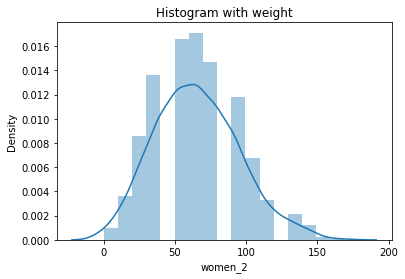

In [83]:
weight=df['women_2']
plt.xlabel("weights for women_2")
plt.title("Histogram with weight")
sns.distplot(weight)

In [84]:
normality_women_1 = stats.shapiro(df['women_1'])
normality_women_2 = stats.shapiro(df['women_2'])

print("Shapiro-Wilk test for normality:")
print("Women 1 - p-value:", normality_women_1[1])
print("Women 2 - p-value:", normality_women_2[1])

Shapiro-Wilk test for normality:
Women 1 - p-value: 0.4625685513019562
Women 2 - p-value: 5.60890309891926e-12


### Here women_1 weight is normally distributed but women_2 weight is slightly right skewed
### from the p-value also it has been seen that women-1 weights distribution is normal and p-value is >0.05 
### but women-2 p-value is <0.05 rejecting the null hypothesis of being the normally distributed of wight


### 1.2 Check one of the following hypotheses (based on where the normality assumption is met) using t-test with appropriate paramenters:

**1.**
* HO - women_1 have bigger weight than men
* H1 - they are not

**2.**
* HO - women_2 have the same weight as men
* H1 - they are not

In [85]:
# for 1st case the normality assumption is accepted
#t = (x̄₁ - x̄₂) / √((s₁² / n₁) + (s₂² / n₂))
t_statistic, p_value = stats.ttest_ind(df['women_1'], df['men'], equal_var=False)
print("Independent Samples t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)
# Step 3: Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that women_1 have smaller weight than men.")
else:
    print("Fail to reject the null hypothesis. There is no evidence that women_1 have smaller weight than men.")

Independent Samples t-test:
t-statistic: -32.56678896106208
p-value: 5.500479251455442e-187
Reject the null hypothesis. There is evidence that women_1 have smaller weight than men.


### p -value is less than 0.05

## Task 2. ANOVA (2 points)

Calcium is an essential mineral that regulates the heart, is important for blood clotting and for building healthy bones. The National Osteoporosis Foundation recommends a daily calcium intake of 1000-1200 mg/day for adult men and women. While calcium is contained in some foods, most adults do not get enough calcium in their diets and take supplements. Unfortunately some of the supplements have side effects such as gastric distress, making them difficult for some patients to take on a regular basis.  

 A study is designed to test whether there is a difference in mean daily calcium intake in adults with normal bone density, adults with osteopenia (a low bone density which may lead to osteoporosis) and adults with osteoporosis. Adults 60 years of age with normal bone density, osteopenia and osteoporosis are selected at random from hospital records and invited to participate in the study. Each participant's daily calcium intake is measured based on reported food intake and supplements. The data are shown below. 

Key steps to follow:

* Checking assumptions for ANOVA
* Performing Anova
* Interpret the results (in markdown or as a comment)

In [86]:
anova_raw = {
    'Normal Bone Density': [1200, 1000, 980, 900, 750, 800],
    'Osteopenia': [1000, 1100, 700, 800, 500, 700],
    'Osteoporosis': [890, 650, 1100, 900, 400, 350]
}

### 2.1 Check assumptions for normality using Shapiro-Wilk test

In [87]:
import scipy.stats as stats

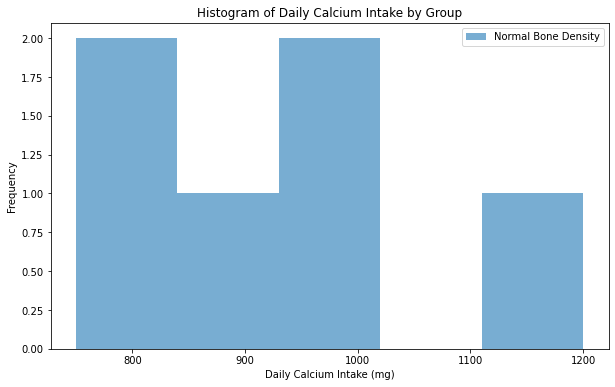

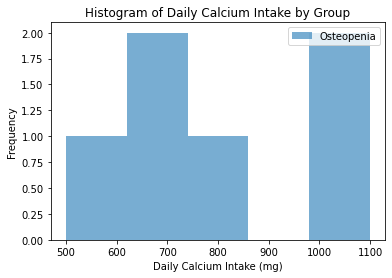

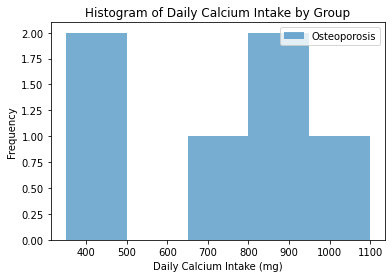

In [88]:
# Visual inspection
plt.figure(figsize=(10, 6))
for group, values in anova_raw.items():
    plt.hist(values, bins=5, alpha=0.6, label=group)
    plt.title('Histogram of Daily Calcium Intake by Group')
    plt.xlabel('Daily Calcium Intake (mg)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [89]:
# Shapiro-Wilk test for normality
for group, values in anova_raw.items():
    stat, p = stats.shapiro(values)
    print(f'{group}: p-value={p:.4f}')

Normal Bone Density: p-value=0.7838
Osteopenia: p-value=0.7828
Osteoporosis: p-value=0.5161


### as here p-value are greater than 0.05 then it is obivious that the distribution is normal for all type of groups

### 2.2 Сheck the assumption of homogeneity of variances

In [90]:
# Levene's test for homogeneity of variances
stat, p = stats.levene(*[values for values in anova_raw.values()])
print(f'Levene\'s test: p-value={p:.4f}')

Levene's test: p-value=0.2286


### as here p value is > 0.05 so homogenity of variances is accepted

### 2.3 Perform ANOVA and interpret the results

In [91]:
# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*[values for values in anova_raw.values()])
print(f'F-statistic={f_statistic:.4f}, p-value={p_value:.4f}')

F-statistic=1.3949, p-value=0.2782


### as here p value is > 0.05 so the null hypothesis can not be rejected  that means the mean of different groups is same

## Task 3. Linear Regression

Given the Dataset in `task_3.csv` make some necessary transformations and train regression model to predict flight tickets' price.

### Dataset Description

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

**Dataset**
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

**Features**

The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

*Dataset is already cleaned*


### 3.1 Data Transformation:

- Transform categorical variables to numeric form. Decide on the most appropriate method, such as one-hot encoding, label encoding, or any other relevant technique.
- Provide justifications for the chosen transformation method and discuss any variables that might be excluded.

In [92]:
df1=pd.read_csv("task_3.csv")

In [93]:
df1.shape

(300153, 12)

In [94]:
df1.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [95]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import  LabelEncoder
cat_columns=['stops','class']
#creating one hot encoder object
encoder = OneHotEncoder(handle_unknown='ignore')

# Create a LabelEncoder object
encoder2 = LabelEncoder()

# Encode categorical variables in the DataFrame
df1['airline_encoded'] = encoder2.fit_transform(df1['airline'])
df1['city_encoded'] = encoder2.fit_transform(df1['flight'])

In [96]:
# Fit the encoder to the categorical columns
encoder.fit(df1[cat_columns])

OneHotEncoder(handle_unknown='ignore')

In [97]:
feature_names = encoder.get_feature_names_out(input_features=cat_columns)

In [98]:
print(feature_names)

['stops_one' 'stops_two_or_more' 'stops_zero' 'class_Business'
 'class_Economy']


In [99]:
encoded_cols = encoder.transform(df1[cat_columns]).toarray()

In [100]:
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(input_features=cat_columns))

# Concatenate the encoded dataframe with the original dataframe
final_df = pd.concat([df1, encoded_df], axis=1)

In [101]:
final_df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_encoded,city_encoded,stops_one,stops_two_or_more,stops_zero,class_Business,class_Economy
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,4,1408,0.0,0.0,1.0,0.0,1.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,4,1387,0.0,0.0,1.0,0.0,1.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0,1213,0.0,0.0,1.0,0.0,1.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,5,1559,0.0,0.0,1.0,0.0,1.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,5,1549,0.0,0.0,1.0,0.0,1.0


In [102]:
final_df1=final_df.drop(['index','airline','flight','source_city','departure_time','stops','arrival_time','destination_city','class'],axis='columns')

In [103]:
final_df1.head()

,duration,days_left,price,airline_encoded,city_encoded,stops_one,stops_two_or_more,stops_zero,class_Business,class_Economy
0,2.17,1,5953,4,1408,0.0,0.0,1.0,0.0,1.0
1,2.33,1,5953,4,1387,0.0,0.0,1.0,0.0,1.0
2,2.17,1,5956,0,1213,0.0,0.0,1.0,0.0,1.0
3,2.25,1,5955,5,1559,0.0,0.0,1.0,0.0,1.0
4,2.33,1,5955,5,1549,0.0,0.0,1.0,0.0,1.0


In [104]:
final_df1['duration'] = ((final_df1['duration'] * 100)//100)*60+(final_df1['duration'] * 100)%100

In [105]:
final_df1.head()

,duration,days_left,price,airline_encoded,city_encoded,stops_one,stops_two_or_more,stops_zero,class_Business,class_Economy
0,137.0,1,5953,4,1408,0.0,0.0,1.0,0.0,1.0
1,153.0,1,5953,4,1387,0.0,0.0,1.0,0.0,1.0
2,137.0,1,5956,0,1213,0.0,0.0,1.0,0.0,1.0
3,145.0,1,5955,5,1559,0.0,0.0,1.0,0.0,1.0
4,153.0,1,5955,5,1549,0.0,0.0,1.0,0.0,1.0


### here index column is not needed and also after one hot encoding categorical columns are removed 

### 3.2 Visualization of Variables:

- Visualize the correlation between variables. Use techniques like correlation matrices or heatmap to represent relationships between different features.
- Discuss any interesting observations or patterns identified during visualization.

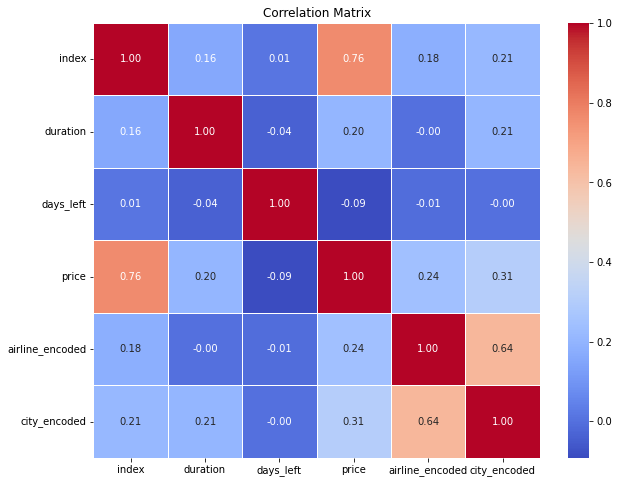

In [106]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### here it has been seen that there have positive correlation between   price and duration and negative correlation between price and days_left and it is very obivious  

### 3.3 Optional Graphs:

- Create additional graphs that you find helpful and insightful for understanding the dataset.
- Examples of optional graphs include distribution plots, box plots, or any other visualization that might provide useful insights. 

C:\Users\USER\AppData\Local\Temp\ipykernel_14844\2788177710.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airline)


<Axes: title={'center': 'Histogram with price'}, xlabel='price', ylabel='Density'>

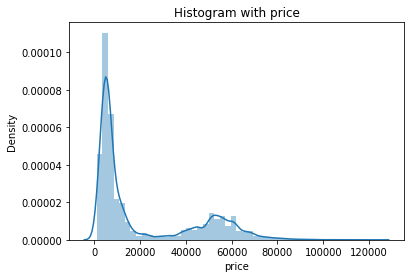

In [107]:
airline=df1['price']
plt.xlabel("Price")
plt.title("Histogram with price")
sns.distplot(airline)

### here maximum price are less than 20000

### 3.4 Linear Regression:
- Perform linear regression to predict ticket prices based on relevant independent variables. Choose variables that are likely to influence the ticket price.
- Evaluate the results using R squared (coefficient of determination) to assess the goodness of fit of the regression model.
- Provide interpretation of the coefficients and discuss the overall performance of the model.

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
X_columns = [col for col in final_df1.columns if col != 'price']
X = final_df1[X_columns]  # Features (independent variables)
Y = final_df1['price']  # Target variable (dependent variable)

In [110]:
X.head()

,duration,days_left,airline_encoded,city_encoded,stops_one,stops_two_or_more,stops_zero,class_Business,class_Economy
0,137.0,1,4,1408,0.0,0.0,1.0,0.0,1.0
1,153.0,1,4,1387,0.0,0.0,1.0,0.0,1.0
2,137.0,1,0,1213,0.0,0.0,1.0,0.0,1.0
3,145.0,1,5,1559,0.0,0.0,1.0,0.0,1.0
4,153.0,1,5,1549,0.0,0.0,1.0,0.0,1.0


In [111]:
Y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [113]:
# Step 4: Create and Fit the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 47820408.00791528
R-squared: 0.907231712010508


### The R-squared value of 0.9072 indicates that the model explains around 90.72% of the variance in the target variable, which is considered to be a good fit.

### The MSE indicates that, on average, the model's predictions are off by approximately 47820408.00791528 units squared.

## Task 4. Classification (3 points)

Given the Dataset in `task_4.csv` make some necessary transformations and train the model to classify the obesity type.

### Dataset Description

The data contains 17 attributes and 2111 records, the records are labeled with the **class variable NObesity (Obesity Level), that allows classification of the data** using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS), other variables obtained were: Gender, Age, Height and Weight.

**Questions of the survey used for initial recollection of information**

Question (Possible Answers)

* What is your gender?	•Female •Male
* What is your age?	Numeric value
* What is your height?	Numeric value in meters
* What is your weight?	Numeric value in kilograms
* Has a family member suffered or suffers from overweight?	•Yes •No
* Do you eat high caloric food frequently? •Yes •No
* Do you usually eat vegetables in your meals?	•Never •Sometimes •Always
* How many main meals do you have daily?	•Between 1 y 2 •Three •More than three
* Do you eat any food between meals? •No •Sometimes •Frequently •Always
* Do you smoke? •Yes •No
* How much water do you drink daily? •Less than a liter •Between 1 and 2 L •More than 2 L
* Do you monitor the calories you eat daily? •Yes •No
* How often do you have physical activity? •I do not have •1 or 2 days •2 or 4 days •4 or 5 days
* How much time do you use technological devices such as cell phone, videogames, television, computer and others? •0–2 hours •3–5 hours •More than 5 hours
* How often do you drink alcohol? •I do not drink •Sometimes •Frequently •Always
* Which transportation do you usually use? •Automobile •Motorbike •Bike •Public Transportation •Walking


### 4.1 Data Preparation:

- Identify and handle missing values, outliers, or any other data quality issues.
- Convert categorical variables into a suitable format for modeling.
- Discuss any decisions made during the data cleaning process.

In [114]:
df2=pd.read_csv("task_4.csv")

In [115]:
df2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [116]:
df2.shape

(2111, 17)

In [117]:
# Create a LabelEncoder object
encoder3 = LabelEncoder()

# Encode categorical variables in the DataFrame
df2['Gender'] = encoder3.fit_transform(df2['Gender'])
df2['family_history_with_overweight'] = encoder3.fit_transform(df2['family_history_with_overweight'])
df2['FAVC'] = encoder3.fit_transform(df2['FAVC'])
df2['CAEC'] = encoder3.fit_transform(df2['CAEC'])
df2['SMOKE'] = encoder3.fit_transform(df2['SMOKE'])
df2['SCC'] = encoder3.fit_transform(df2['SCC'])
df2['CALC'] = encoder3.fit_transform(df2['CALC'])
df2['MTRANS'] = encoder3.fit_transform(df2['MTRANS'])
df2['NObeyesdad'] = encoder3.fit_transform(df2['NObeyesdad'])

In [118]:
df2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


### 4.2 Training and Hyperparameter Tuning::

- Select a classification model for predicting 'NObeyesdad'
- Split the dataset into training and testing sets.
- Train the chosen model on the training set.

In [119]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [120]:
X_columns = [col for col in df2.columns if col != 'NObeyesdad']
X = df2[X_columns]  # Features (independent variables)
Y = df2['NObeyesdad']  # Target variable (dependent variable)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [122]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15 , 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}


In [123]:
# Initialize GridSearchCV with the classifier and hyperparameter grid
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 15, 20]})

In [124]:

# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [125]:
# Make predictions on the testing data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

### 4.3 Model Evaluation:

- Evaluate the trained model on the testing set.
- Choose appropriate evaluation metrics for a classification task (e.g., accuracy, precision, recall, F1-score).

In [126]:
# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9621749408983451
